<a href="https://colab.research.google.com/github/pmantoine4/PA_D_24/blob/main/Building_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Define the Problem

 This project utilizes the NYC rolling sales dataset to predict the sale price of  buildings in NYC. The dataset contains 84548 rows and 22 columns. We are going to choose, train and test three different ML models to predict the sale price of buildings in NYC.

#Task 2a: Install the Needed Libraries

#Task 2b: Import the Needed Libraries

In [93]:
#Importing the needed Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Task 3: Load the Data

In [94]:
#Loading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/nyc-rolling-sales.csv')

#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [95]:
#To show and understand the data (the first 20 rows)
data.head(20)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [96]:
#To show and understand the data ( the last 20 rows).
data.tail(20)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84528,8394,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7092,140,,B9,10 TRINA LANE,...,2,0,2,3936,1470,2004,1,B9,550000,2017-06-20 00:00:00
84529,8395,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7105,2,,B9,118 TURNER STREET,...,2,0,2,6268,2206,2010,1,B9,545000,2016-11-16 00:00:00
84530,8396,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7105,660,,B2,125 CLAY PIT ROAD,...,2,0,2,10935,2683,1998,1,B2,800000,2017-01-09 00:00:00
84531,8397,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7267,130,,B9,65 SHARROTTS LANE,...,2,0,2,4300,2170,1998,1,B9,642500,2017-06-22 00:00:00
84532,8398,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7267,131,,B9,67 SHARROTTS LANE,...,2,0,2,4700,2170,1998,1,B9,408092,2016-09-26 00:00:00
84533,8399,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7267,182,,B2,27 RED CEDAR LANE,...,2,0,2,3985,2700,1996,1,B2,600000,2017-02-27 00:00:00
84534,8400,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7267,202,,B9,30 HEMLOCK LANE,...,2,0,2,3801,2704,1996,1,B9,610000,2016-12-05 00:00:00
84535,8401,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7267,218,,B2,33 WHITE OAK LANE,...,2,0,2,7885,2704,1996,1,B2,645000,2017-08-04 00:00:00
84536,8402,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7267,244,,B2,19 SPRUCE LANE,...,2,0,2,3800,2700,1996,1,B2,168000,2017-01-19 00:00:00
84537,8403,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7267,249,,B2,48 WHITE OAK LANE,...,2,0,2,4350,2840,1996,1,B2,625000,2016-10-18 00:00:00


##Get Data Info

In [5]:
#The dataset contains 84548 rows and 22 columns. Ten of the columns are numerical and 12 are non-numerical values. The dataset has no missing values but some of the values are represented by a "-" and for some columns, what appeared as numerical values are treated as object datatype (LAND SQUARE FEET,	GROSS SQUARE FEET, SALE PRICE, SALE DATE)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [6]:
#To confirm the number of rows and columns
data.shape

(84548, 22)

In [ ]:
#To obtain the descriptive statistics of the dataset. We notice that some columns has 0 as minimum value.
data.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


##Find Missing Values

#Task 5: Perform Data Cleaning

In [7]:
#Looking for missing values. No missing values are identified at this stage.
data.isnull().sum().any()

False

In [99]:
#Converting object to numeric data type in the followinng columns:SALE PRICE, LAND SQUARE FEET, GROSS SQUARE FEET.
data['LAND SQUARE FEET']=pd.to_numeric(data['LAND SQUARE FEET'], errors='coerce')
data['GROSS SQUARE FEET']=pd.to_numeric(data['GROSS SQUARE FEET'], errors='coerce')
data['SALE PRICE']=pd.to_numeric(data['SALE PRICE'], errors='coerce')

In [100]:
#To confirm that the data type for the values of the columns mentionned above are now float64
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            84548 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       84548 non-null  object 
 8   BUILDING CLASS AT PRESENT       84548 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                84548 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

In [103]:
#Descriptive statistics are now obtained for Land SQUARE FEET, GROSS SQUARE FEET, and SALE PRICE
data.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,5.829600e+04,5.693600e+04,84548.000000,84548.000000,6.998700e+04
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1789.322976,1.657485,1.276456e+06
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,4.198397e+04,3.503249e+04,537.344993,0.819341,1.140526e+07
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1.650000e+03,1.046750e+03,1920.000000,1.000000,2.250000e+05
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,1940.000000,2.000000,5.300000e+05
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,3.500000e+03,2.560000e+03,1965.000000,2.000000,9.500000e+05
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [104]:
# After the conversion, missing values are observed in 3 columns.
data.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [105]:
#Replacing the missing values  by the mean value of each column (imputation)
data['LAND SQUARE FEET'].fillna(data['LAND SQUARE FEET'].mean(), inplace=True)
data['GROSS SQUARE FEET'].fillna(data['GROSS SQUARE FEET'].mean(), inplace=True)
data['SALE PRICE'].fillna(data['SALE PRICE'].mean(), inplace=True)

In [106]:
#No more missing values are detected after realizing the imputation
data.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [107]:
#The descriptive statistics confirm the presence of 84548 rows but we still notice the presence of 0 (zero) as minimum value for columns like "TOTAL UNITS" "LANND SQUAREE FEET", "GROSS SQUARE FEET", and "SALE PRICE".
data.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,8.454800e+04,8.454800e+04,84548.000000,84548.000000,8.454800e+04
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1789.322976,1.657485,1.276456e+06
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,3.486182e+04,2.874826e+04,537.344993,0.819341,1.037675e+07
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,2.000000e+03,1.348000e+03,1920.000000,1.000000,3.000000e+05
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,3.200000e+03,2.520000e+03,1940.000000,2.000000,6.700000e+05
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,3.941676e+03,4.045707e+03,1965.000000,2.000000,1.276456e+06
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [108]:
#Dropping the rows with values equal to zero in the following columnns
data = data.drop(data[data['TOTAL UNITS'] == 0].index)
data = data.drop(data[data['LAND SQUARE FEET'] == 0].index)
data = data.drop(data[data['GROSS SQUARE FEET'] == 0].index)
data = data.drop(data[data['SALE PRICE'] == 0].index)

In [109]:
# After the previous opeeration, the dataset is reduced to 51013 rows
data.shape

(51013, 22)

In [110]:
data.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,51013.000000,51013.000000,51013.00000,51013.000000,51013.000000,51013.000000,51013.000000,51013.000000,5.101300e+04,5.101300e+04,51013.000000,51013.000000,5.101300e+04
mean,10042.003764,3.245663,4672.18707,385.456021,10844.454551,2.682963,0.274538,2.989120,4.284202e+03,4.693321e+03,1856.921863,1.483543,1.664134e+06
std,7343.025808,1.353857,3897.04934,665.249994,656.272147,20.102304,11.162289,23.131098,3.369690e+04,3.433956e+04,417.788564,0.827816,1.308006e+07
min,4.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000e+02,1.200000e+02,0.000000,1.000000,1.000000e+00
25%,3888.000000,2.000000,1348.00000,25.000000,10306.000000,1.000000,0.000000,1.000000,2.200000e+03,1.530000e+03,1920.000000,1.000000,5.000000e+05
50%,8127.000000,4.000000,3799.00000,54.000000,11209.000000,1.000000,0.000000,1.000000,3.400000e+03,2.360000e+03,1940.000000,1.000000,9.100000e+05
75%,15870.000000,4.000000,6905.00000,1002.000000,11369.000000,2.000000,0.000000,2.000000,3.941676e+03,4.045707e+03,1975.000000,2.000000,1.276456e+06
max,26739.000000,5.000000,16322.00000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


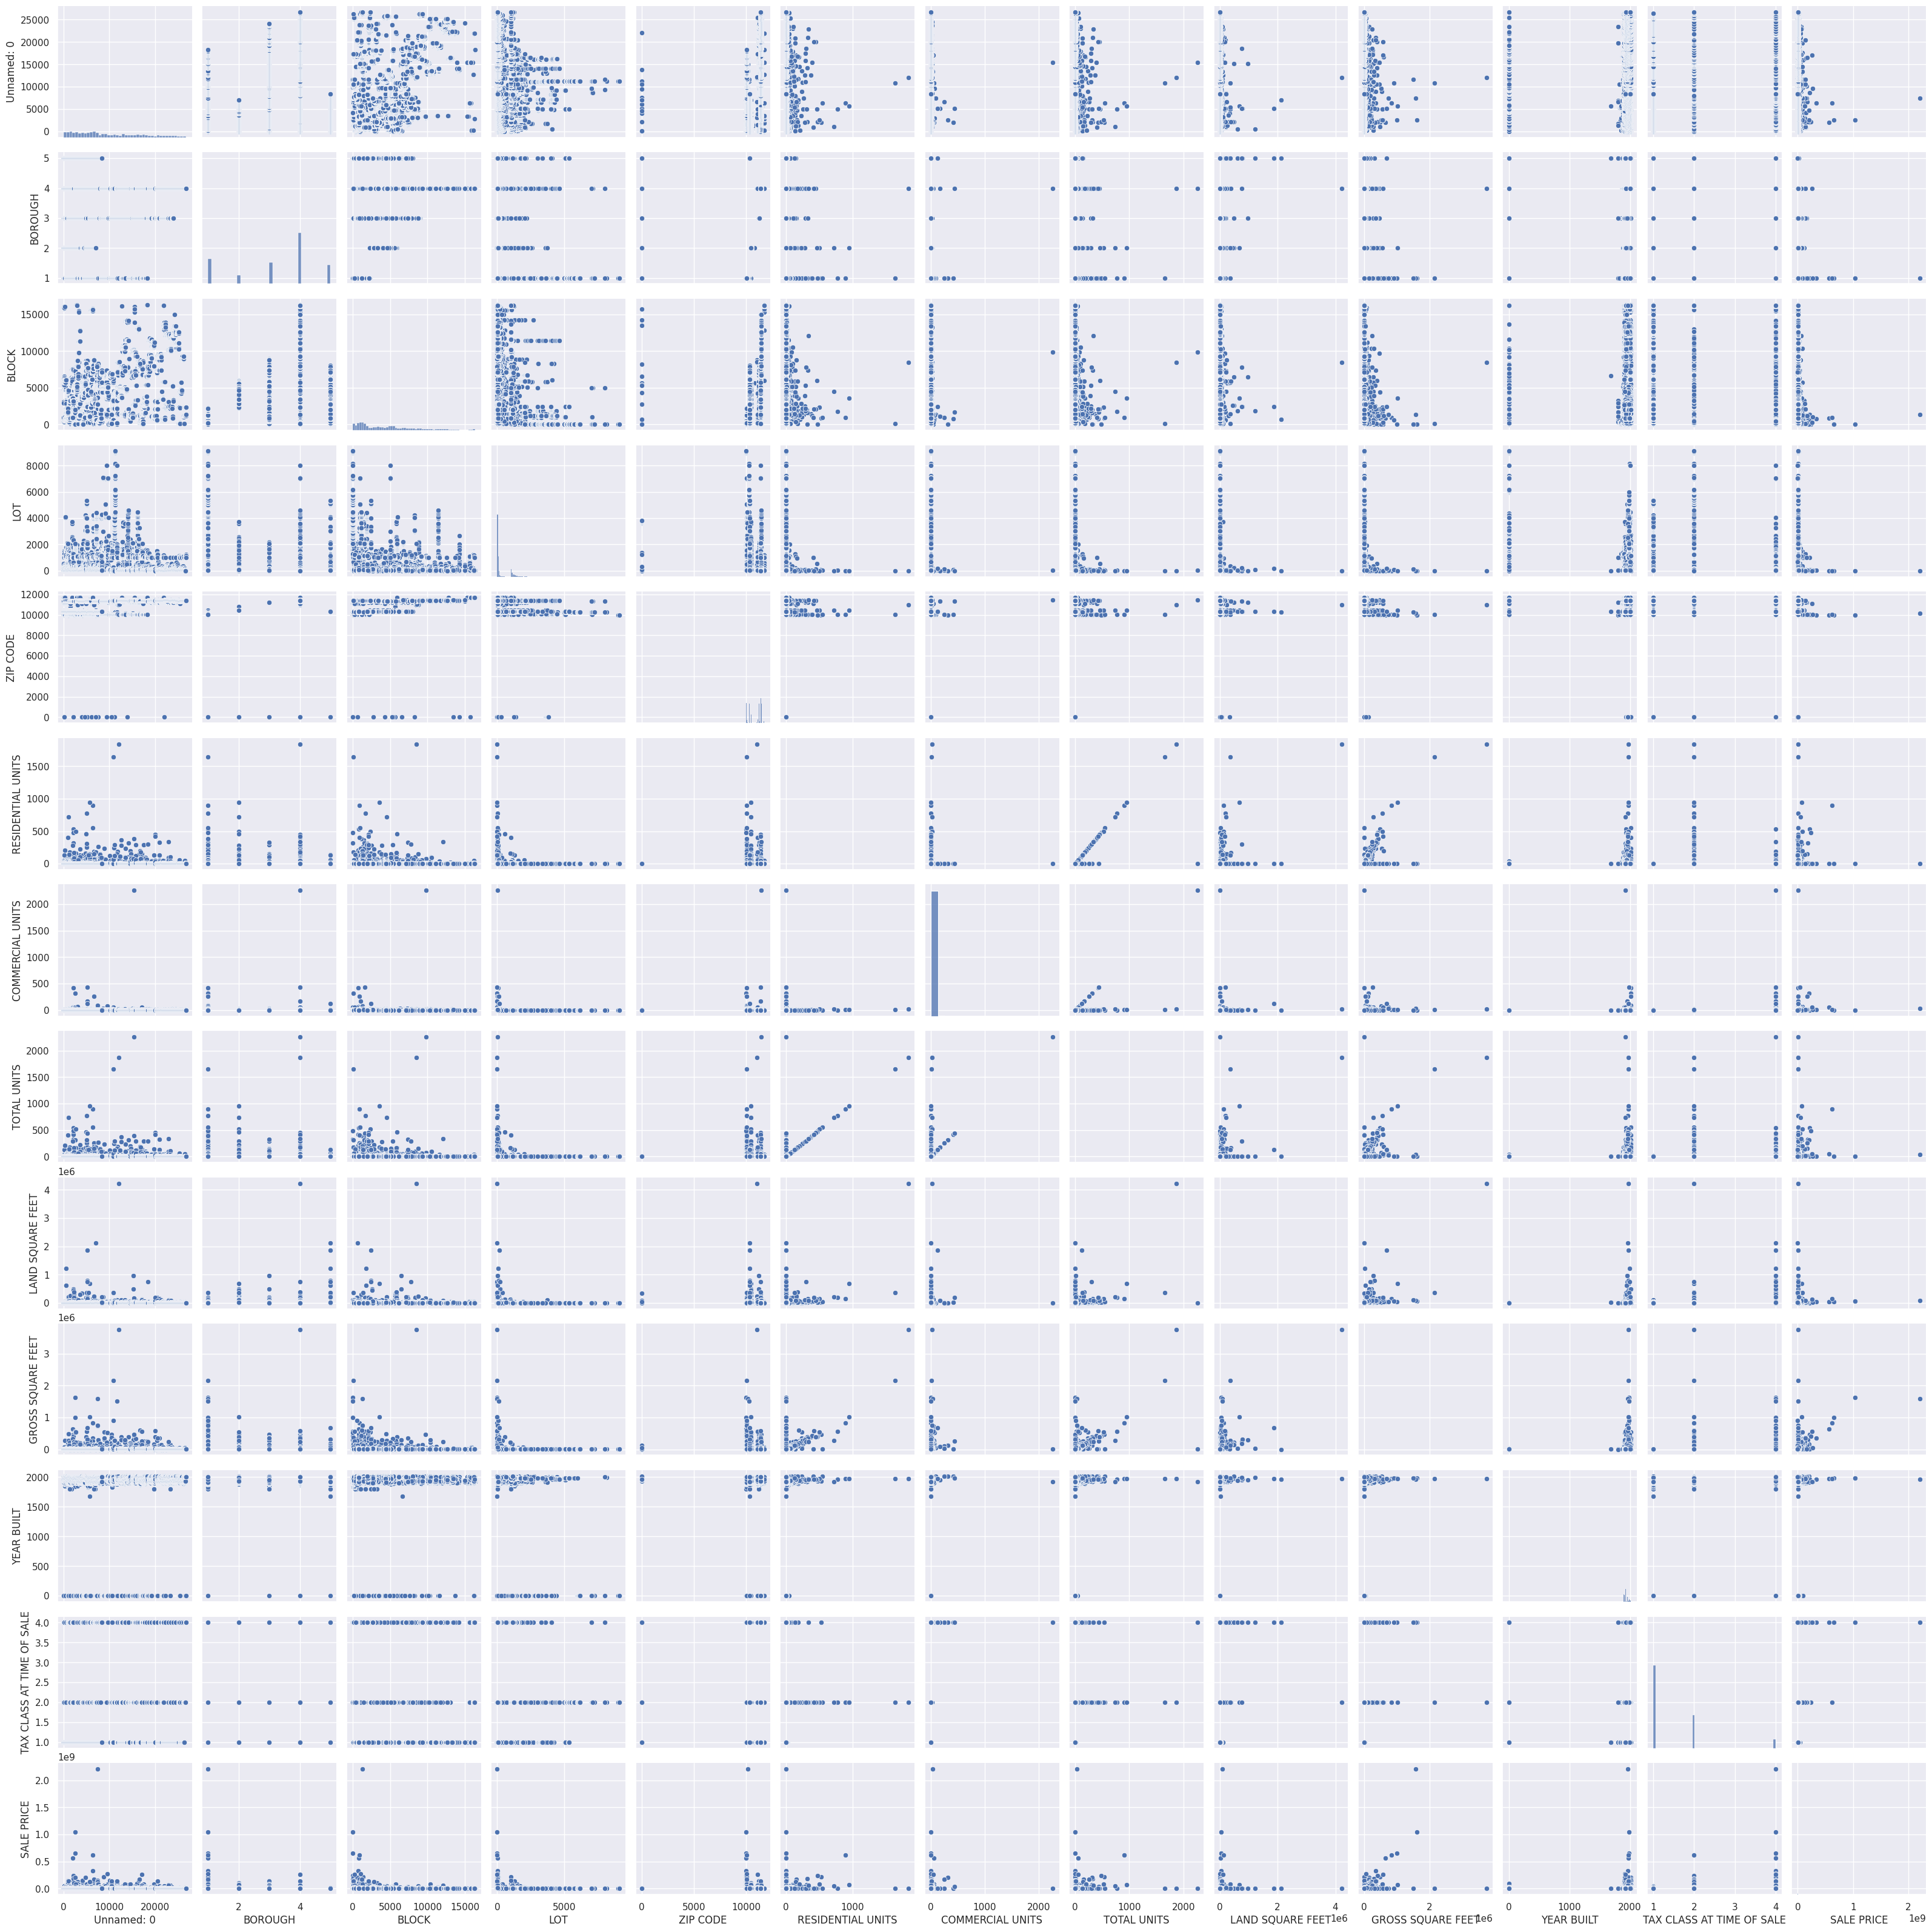

In [19]:
#Visualizing the data
#Pairplot allows us to see both the distribution of variables and the relationships between two variables. Our Target column is 'SALE PRICE'.

pairplot = sns.pairplot(data)

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'BOROUGH'}>,
        <Axes: title={'center': 'BLOCK'}>,
        <Axes: title={'center': 'LOT'}>],
       [<Axes: title={'center': 'ZIP CODE'}>,
        <Axes: title={'center': 'RESIDENTIAL UNITS'}>,
        <Axes: title={'center': 'COMMERCIAL UNITS'}>,
        <Axes: title={'center': 'TOTAL UNITS'}>],
       [<Axes: title={'center': 'LAND SQUARE FEET'}>,
        <Axes: title={'center': 'GROSS SQUARE FEET'}>,
        <Axes: title={'center': 'YEAR BUILT'}>,
        <Axes: title={'center': 'TAX CLASS AT TIME OF SALE'}>],
       [<Axes: title={'center': 'SALE PRICE'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

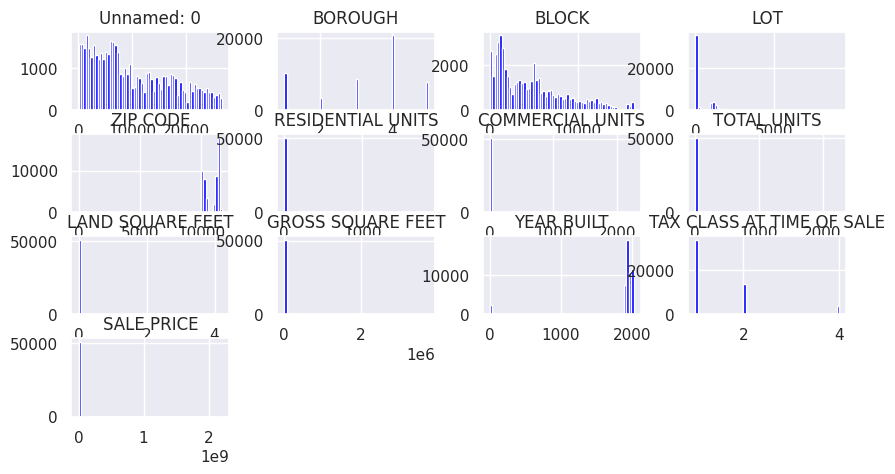

In [111]:
data.hist(color='blue', bins=60, figsize=(10,5))

<Axes: xlabel='BOROUGH', ylabel='count'>

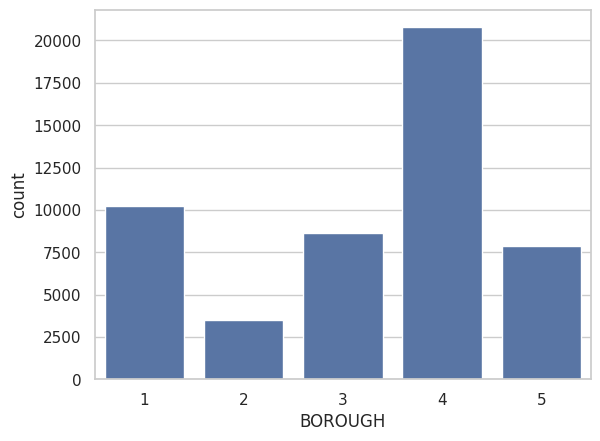

In [115]:
sns.set_style('whitegrid')
sns.countplot(x='BOROUGH',data=data)

<Axes: xlabel='TAX CLASS AT PRESENT', ylabel='count'>

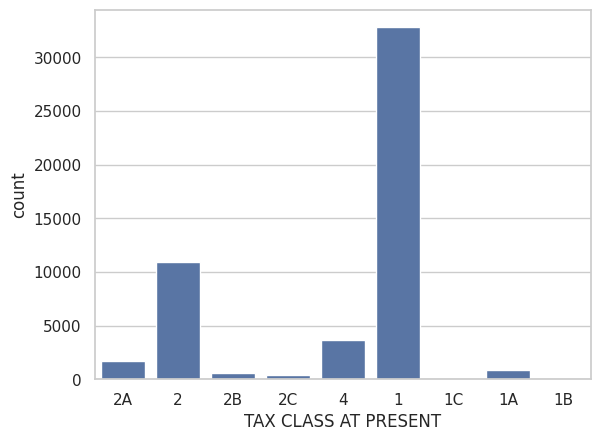

In [146]:
sns.set_style('whitegrid')
sns.countplot(x='TAX CLASS AT PRESENT',data=data)

<Axes: xlabel='LAND SQUARE FEET', ylabel='SALE PRICE'>

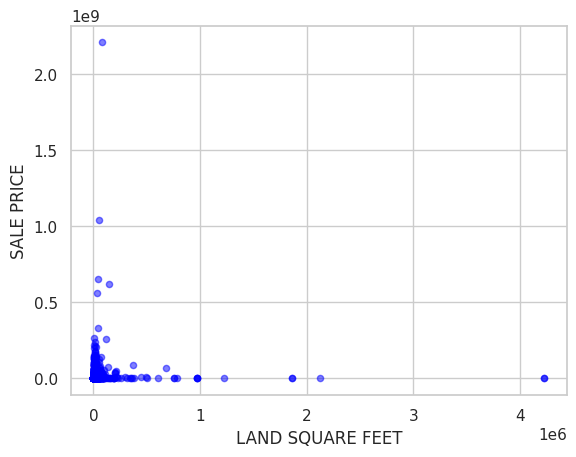

In [147]:
data.plot(kind='scatter',x='LAND SQUARE FEET',y='SALE PRICE',alpha=0.5,color='blue')

<Axes: xlabel='GROSS SQUARE FEET', ylabel='SALE PRICE'>

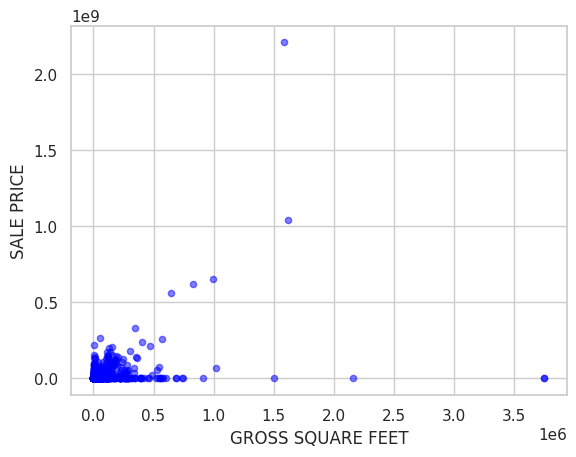

In [148]:
data.plot(kind='scatter',x='GROSS SQUARE FEET',y='SALE PRICE',alpha=0.5,color='blue')

<Axes: xlabel='TOTAL UNITS', ylabel='SALE PRICE'>

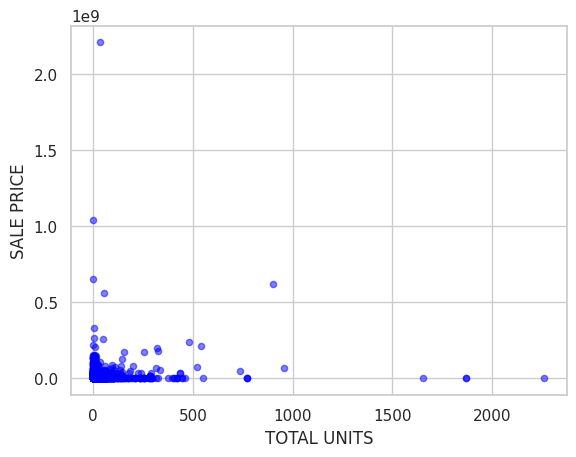

In [149]:
data.plot(kind='scatter',x='TOTAL UNITS',y='SALE PRICE',alpha=0.5,color='blue')

<Axes: xlabel='YEAR BUILT', ylabel='SALE PRICE'>

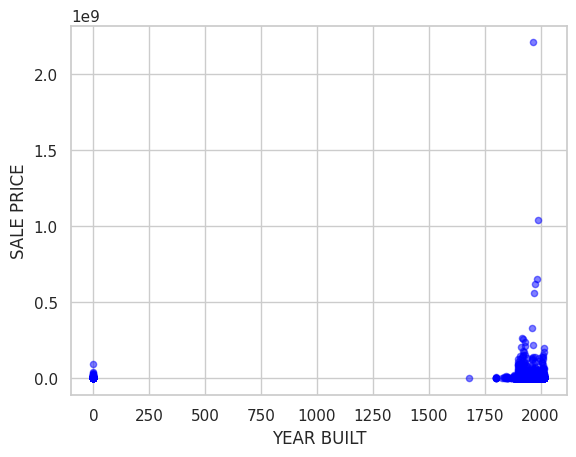

In [150]:
data.plot(kind='scatter',x='YEAR BUILT',y='SALE PRICE',alpha=0.5,color='blue')

In [116]:
data.head(20)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633.000000,6440.000000,1900,2,C2,6.625000e+06,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616.000000,18690.000000,1900,2,C7,1.276456e+06,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212.000000,7803.000000,1900,2,C7,1.276456e+06,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272.000000,6794.000000,1913,2,C4,3.936272e+06,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369.000000,4615.000000,1900,2,C2,8.000000e+06,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581.000000,9730.000000,1900,2,C4,1.276456e+06,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750.000000,4226.000000,1920,2,C4,3.192840e+06,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163.000000,21007.000000,1900,2,C7,1.276456e+06,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534.000000,9198.000000,1920,2,D5,1.276456e+06,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489.000000,18523.000000,1920,2,D9,1.623200e+07,2016-11-07 00:00:00


#Task 6: Visualize Cleaned up Dataset

<Axes: >

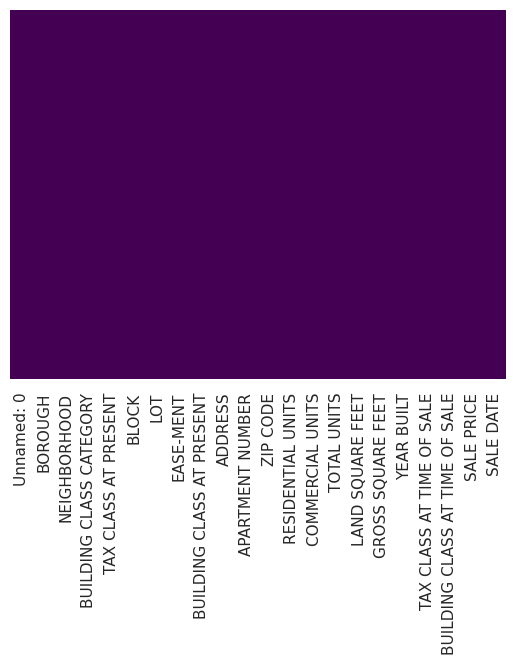

In [ ]:
#To show the dataset is clean
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#Task 7: Conceptualize the problem

#Task 8: Perform Data-Split

In [122]:
#splitting the data. These features are chosen for x
x= data[['BOROUGH','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET']].values
y=data['SALE PRICE'].values

In [123]:
type(x)

numpy.ndarray

In [124]:
type(y)

numpy.ndarray

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

#Task 9: Choose the ML Method to follow

In [158]:
#These 3 models  used in class are chosen to predict the sale price of buildings in NYC.
DecisionTree_model = DecisionTreeRegressor()
RandomForest_model = RandomForestRegressor()
LinearRegression_model = LinearRegression()

#Task 10: Train the ML Model

In [159]:
#Training the models
models = [DecisionTree_model, RandomForest_model, LinearRegression_model]
for model in models:
    model.fit(x_train, y_train)
    print(f'{model} is trained!')

DecisionTreeRegressor() is trained!
RandomForestRegressor() is trained!
LinearRegression() is trained!


#Task 11: Test the Model

In [160]:
#Testing the models
accuracy_DecisionTree = DecisionTree_model.score(x_test, y_test)
accuracy_RandomForest = RandomForest_model.score(x_test, y_test)
accuracy_LinearRegression = LinearRegression_model.score(x_test, y_test)

In [161]:
models = [DecisionTree_model, RandomForest_model, LinearRegression_model]
for model in models:
    print(f'{model} accuracy is {model.score(x_test, y_test)}')

DecisionTreeRegressor() accuracy is -0.14429612057003793
RandomForestRegressor() accuracy is 0.2960662041682942
LinearRegression() accuracy is 0.4235563657657829


In [162]:
test_x = np.zeros((1,4))
test_x

array([[0., 0., 0., 0.]])

In [163]:
test_x[0,0] = 1          # BOROUGH -- float
test_x[0,1] = 1          # TOTAL UNITS -- float
test_x[0,2] = 3400       # LAND SQUARE FEET -- float
test_x[0,3] = 2360       # GROSS SQUARE FEET -- float

In [164]:
test_x

array([[1.00e+00, 1.00e+00, 3.40e+03, 2.36e+03]])

In [169]:
models = [DecisionTree_model, RandomForest_model, LinarRegression_model]
for model in models:
  prediction = model.predict(test_x)
  print(f'The model {model} predicts a price for a building in NYC of ${round(float(prediction[0]),2)}')


The model DecisionTreeRegressor() predicts a price for a building in NYC of $1276456.5
The model RandomForestRegressor() predicts a price for a building in NYC of $2085279.55
The model LinearRegression() predicts a price for a building in NYC of $2105704.76


In [170]:
joblib.dump(RandomForest_model, 'RandomForest_model.joblib')

['RandomForest_model.joblib']

In [171]:
"""
The pickle library/method takes a number of parameters,
1.  the thing we want to save
2.  the place in which we want to save whatever it is that we want to save
3.  the mode for the method to access the file and place for the save.
"""

'\nThe pickle library/method takes a number of parameters,\n1.  the thing we want to save\n2.  the place in which we want to save whatever it is that we want to save\n3.  the mode for the method to access the file and place for the save.\n'

In [172]:
reg = joblib.load('RandomForest_model.joblib')

In [173]:
predictions = reg.predict(test_x)
predictions

array([2085279.55211092])

In [174]:
print(f'The model predicts a price for a building in NYC of ${round(float(predictions[0]), 2)}')

The model predicts a price for a building in NYC of $2085279.55
